In [126]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

# Import data

In [12]:
DATA_PATH = '../data/'

In [13]:
df = pd.read_csv(DATA_PATH + 'log_data_and_log_text_10k.csv')

In [14]:
df_100 = pd.read_csv(DATA_PATH + 'log_data_and_log_text_100k.csv')

In [15]:
df.head(1)

,17550413,2020-10-18 04:28:14.113,PriceCalcWs,3,135,SOAP request processed,0x30343A32383A31342E3135333A204665746368696E672064617461207769746820746F6B656E206F66202235346261633962652D336633622D343139382D393934622D6366303833643637376132662220616E6420726567696F6E206F662022444B31222E0D0A30343A32383A31342E3239333A2052657475726E696E6720393920726F77732E,"04:28:14.153: Fetching data with token of ""54bac9be-3f3b-4198-994b-cf083d677a2f"" and region of ""DK1"". 04:28:14.293: Returning 99 rows."
0,16631685,2020-08-19 00:36:09.640,PriceCalc,3,22942.0,PriceCalc finished in 8 seconds.,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."


In [16]:
# Read CSV into pandas dataframe
# Bad EOF error due to extra quotemark
# Also many lines contain excess fields
# These issues were not present during initial load.

# import csv
# df = pd.read_csv('log_data_and_log_text_10k.csv', quoting=3, error_bad_lines=False)

# Data cleaning #1

log_ID: Unik automatisk ID

log_Date: Tidspunkt for log entry

log_Application: Unik tekst per applikasjon

Hva er Log_AttLen?

lvl_ID: Referer til dbo.LogLevel

log_Text: Overskrift for log

log_Data: En VARBINARY(MAX) blob men inneholder uten unntak bare text og kan 

castes direkte til VARCHAR(MAX).

## Fix column headers

In [17]:
# add column headers
df.columns = ['log_id',
              'log_date',
              'log_application',
              'lvl_id',
              'log_attlen',
              'log_text',
              'log_data',
              'text_data']

In [18]:
df_100.columns = ['log_id',
              'log_date',
              'log_application',
              'lvl_id',
              'log_attlen',
              'log_text',
              'log_data',
              'text_data']

In [19]:
df.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
0,16631685,2020-08-19 00:36:09.640,PriceCalc,3,22942.0,PriceCalc finished in 8 seconds.,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
1,17550414,2020-10-18 04:28:15.283,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A31352E3337313A204665746368696E67...,"04:28:15.371: Fetching data with token of ""54b..."
2,17550415,2020-10-18 04:28:17.410,PriceCalcWs,3,169.0,SOAP request processed,0x30343A32383A31372E3439363A2052657475726E696E...,04:28:17.496: Returning 99 rows. 04:28:17.496:...
3,17550416,2020-10-18 04:28:17.460,PriceCalcWs,3,NaN,SOAP request processed,NaN,NaN
4,17550420,2020-10-18 04:28:45.580,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A34352E3636383A204665746368696E67...,"04:28:45.668: Fetching data with token of ""54b..."


In [20]:
# Index is incorrect with the new EOF & field loading error

# Resetting index
# df.reset_index(inplace=True)

# General Exploration

In [21]:
df.shape

(9999, 8)

In [22]:
df_100.shape

(99999, 8)

In [23]:
# Starts 1st of August
df_100.head(2)

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
0,16631685,2020-08-19 00:36:09.640,PriceCalc,3,22942.0,PriceCalc finished in 8 seconds.,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
1,17550414,2020-10-18 04:28:15.283,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A31352E3337313A204665746368696E67...,"04:28:15.371: Fetching data with token of ""54b..."


In [24]:
# Ends 10th of November
df_100.tail(2)

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
99997,18231013,2020-11-08 17:59:40.770,PriceCalcWs,3,135.0,SOAP request processed,0x31373A35393A34302E3731373A204665746368696E67...,"17:59:40.717: Fetching data with token of ""54b..."
99998,18231014,2020-11-08 17:59:44.463,PriceCalcWs,3,135.0,SOAP request processed,0x31373A35393A34342E3337343A204665746368696E67...,"17:59:44.374: Fetching data with token of ""54b..."


In [25]:
df.describe()

,log_id,lvl_id,log_attlen
count,9.999000e+03,9999.000000,7790.000000
mean,1.748483e+07,2.990599,1412.355071
std,2.320866e+05,0.133098,6840.063512
min,1.639552e+07,1.000000,0.000000
25%,1.738189e+07,3.000000,135.000000
50%,1.763927e+07,3.000000,135.000000
75%,1.764514e+07,3.000000,135.000000
max,1.809544e+07,3.000000,245231.000000


In [26]:
df.describe(include='all')

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
count,9.999000e+03,9999,9999,9999.000000,7790.000000,9997,7790,7789
unique,NaN,9992,32,NaN,NaN,1029,7362,7361
top,NaN,2020-10-17 23:45:49.173,PriceCalcWs,NaN,NaN,SOAP request processed,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
freq,NaN,3,7579,NaN,NaN,7352,25,25
mean,1.748483e+07,NaN,NaN,2.990599,1412.355071,NaN,NaN,NaN
std,2.320866e+05,NaN,NaN,0.133098,6840.063512,NaN,NaN,NaN
min,1.639552e+07,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,1.738189e+07,NaN,NaN,3.000000,135.000000,NaN,NaN,NaN
50%,1.763927e+07,NaN,NaN,3.000000,135.000000,NaN,NaN,NaN
75%,1.764514e+07,NaN,NaN,3.000000,135.000000,NaN,NaN,NaN


In [27]:
# Consider making attlen -> int if relevant to model
# log_date -> datetime
# appropriate text_data -> key: value & ints OR dictionaries / individual DFs
df.dtypes

log_id               int64
log_date            object
log_application     object
lvl_id               int64
log_attlen         float64
log_text            object
log_data            object
text_data           object
dtype: object

In [28]:
PriceCalcWs = df[df['log_application'] == 'PriceCalcWs']


In [29]:
PriceCalcWs.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
1,17550414,2020-10-18 04:28:15.283,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A31352E3337313A204665746368696E67...,"04:28:15.371: Fetching data with token of ""54b..."
2,17550415,2020-10-18 04:28:17.410,PriceCalcWs,3,169.0,SOAP request processed,0x30343A32383A31372E3439363A2052657475726E696E...,04:28:17.496: Returning 99 rows. 04:28:17.496:...
3,17550416,2020-10-18 04:28:17.460,PriceCalcWs,3,NaN,SOAP request processed,NaN,NaN
4,17550420,2020-10-18 04:28:45.580,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A34352E3636383A204665746368696E67...,"04:28:45.668: Fetching data with token of ""54b..."
5,17550421,2020-10-18 04:28:45.690,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A34352E3738333A204665746368696E67...,"04:28:45.783: Fetching data with token of ""54b..."


In [30]:
# DF contains many more applications than described in dbo.application
df['log_application'].value_counts()

PriceCalcWs                    7579
WAPI Curve Import               485
iRisk Data Services             438
RockyII                         434
Transfer To Nimbus              294
Wind Power Import               221
ComTSExport                      93
PriceCalc                        85
Fin BO to Powel                  81
Nord Pool Trades                 68
Nord Pool Market Data            35
Nasdaq Fix                       32
Nasdaq FDS Reader                27
SEB Currency Feed                26
Ftp Trigger Script               25
Brady Oracle Scripts             12
GreenCert                        12
TradeFetcher                     12
Nasdaq Data Import               11
MKInvoice                        11
FinBoReporting                    3
Nord Pool Prices                  3
MiFiR Reporting                   3
Nimbus Day Ahead Trades           1
EF+ Index Management              1
Nasdaq Product Import             1
IndexMgmt                         1
Excel                       

In [31]:
len(df_100['log_application'].value_counts())

42

In [32]:
df_100['log_application'].value_counts()

PriceCalcWs                    77239
iRisk Data Services             5675
WAPI Curve Import               4130
RockyII                         2684
Transfer To Nimbus              2547
Wind Power Import               2172
ComTSExport                      962
Fin BO to Powel                  757
PriceCalc                        746
Nord Pool Trades                 642
Nasdaq Fix                       394
Nord Pool Market Data            383
SEB Currency Feed                358
Nasdaq FDS Reader                276
Ftp Trigger Script               248
Brady Oracle Scripts             153
Nasdaq Data Import               148
MKInvoice                        101
TradeFetcher                      98
GreenCert                         97
FinBoReporting                    20
Remit Reporting                   18
MiFiR Reporting                   17
Nord Pool Prices                  15
Nasdaq Span Import                 9
FinBo Aggregation                  9
VolPerDay aggregation              9
E

In [33]:
# Decently high cardinality
# Most text_data clusters around 135 -> probably due to majority of log being 
# PriceCalcWs calls
df['log_attlen'].value_counts()

135.0      5431
136.0       173
122.0       162
93.0        142
121.0       131
120.0       118
403.0        54
179.0        34
119.0        27
22358.0      25
169.0        20
676.0        18
73379.0      14
2040.0       13
22812.0      13
581.0        12
4606.0       12
103.0        12
193.0        11
22356.0      11
1426.0       11
521.0        11
15412.0      11
65376.0      10
269.0        10
4670.0        9
430.0         9
178.0         8
180.0         8
600.0         8
           ... 
1620.0        1
1120.0        1
1019.0        1
1212.0        1
2087.0        1
583.0         1
1129.0        1
613.0         1
4557.0        1
1056.0        1
44673.0       1
173.0         1
1412.0        1
1269.0        1
17932.0       1
793.0         1
699.0         1
83664.0       1
347.0         1
1706.0        1
2729.0        1
2873.0        1
4638.0        1
1675.0        1
4666.0        1
25925.0       1
1190.0        1
4680.0        1
7505.0        1
2033.0        1
Name: log_attlen, Length

In [34]:
df['log_text'].value_counts()

SOAP request processed                                                                7352
Request handled spGetiRiskData                                                         438
Running import from API to Powel                                                       221
REST request processed                                                                 221
Curve/Actual processed changes: Import                                                 110
Physical trades data is being exported to Brady from Financial BackOffice               91
Exporting to Powel TSS from Financial BO                                                81
Curve/Forecast processed changes: Import                                                39
PriceCalc finished in 8 seconds.                                                        39
Processing 1 trades not saved in RockyII                                                33
PriceCalc finished in 9 seconds.                                                        31

In [35]:
df['lvl_id'].value_counts()

3    9947
1      42
2      10
Name: lvl_id, dtype: int64

In [36]:
df_100['lvl_id'].value_counts()

3    99599
2      295
1      101
0        4
Name: lvl_id, dtype: int64

### Looking at errors in lvl_id

In [37]:
# Almost all errors are in Transfer To Nimbus, over the course of two days
# Makes me believe that this dataset contains a lot of resolved errors
# And that looking at identified errors in the dataset is uninteresting.
df[df['lvl_id'] == 1]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
1137,16962253,2020-09-15 09:29:30.847,Transfer To Nimbus,1,753.0,ECS processed changes:,0x0D0A30393A32383A34313A2050726F63657373696E67...,09:28:41: Processing HydroGrid Bids 09:28:41:...
1138,16962259,2020-09-15 09:30:19.720,Transfer To Nimbus,1,753.0,ECS processed changes:,0x0D0A30393A32393A33303A2050726F63657373696E67...,09:29:30: Processing HydroGrid Bids 09:29:30:...
1139,16962266,2020-09-15 09:31:08.510,Transfer To Nimbus,1,753.0,ECS processed changes:,0x0D0A30393A33303A31393A2050726F63657373696E67...,09:30:19: Processing HydroGrid Bids 09:30:19:...
1921,17641159,2020-10-21 16:38:20.013,PriceCalcWs,1,266.0,An unexpected error occurred,0x31363A33383A31382E3137313A204665746368696E67...,"16:38:18.171: Fetching data with token of ""54b..."
1942,16580522,2020-08-15 12:00:57.440,Transfer To Nimbus,1,745.0,HydroGrid Bids processed changes:,0x0D0A31323A30303A35373A2050726F63657373696E67...,12:00:57: Processing Curve/Actual 12:00:57: P...
1943,16580523,2020-08-15 12:00:57.517,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30303A35373A2050726F63657373696E67...,12:00:57: Processing HydroGrid Plans 12:00:57...
1945,16580533,2020-08-15 12:01:32.060,Transfer To Nimbus,1,1328.0,HydroGrid Bids processed changes:,0x0D0A31323A30313A32383A2050726F63657373696E67...,12:01:28: Processing ECS 12:01:28: Executing ...
1946,16580535,2020-08-15 12:01:32.153,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30313A33323A2050726F63657373696E67...,12:01:32: Processing HydroGrid Plans 12:01:32...
1947,16580536,2020-08-15 12:02:03.910,Transfer To Nimbus,1,1426.0,HydroGrid Bids processed changes:,0x0D0A31323A30313A33323A204C6F6767696E67206F66...,12:01:32: Logging off Powel 12:02:02: Logged ...
2156,16580600,2020-08-15 12:07:06.377,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30373A30363A2050726F63657373696E67...,12:07:06: Processing HydroGrid Plans 12:07:06...


In [38]:
# 2 = Warning
df[df['lvl_id'] == 2]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
44,16845325,2020-09-05 10:51:06.737,WAPI Curve Import,2,2299.0,Checking subscriptions 05.09.2020 10:50:19,0x20202020202020202020202020202020202020202020...,...
45,16845334,2020-09-05 10:52:11.100,WAPI Curve Import,2,1887.0,Checking subscriptions 05.09.2020 10:51:19,0x20202020202020202020202020202020202020202020...,...
46,16845342,2020-09-05 10:53:30.980,WAPI Curve Import,2,2632.0,Checking subscriptions 05.09.2020 10:52:20,0x20202020202020202020202020202020202020202020...,...
47,16845349,2020-09-05 10:54:38.790,WAPI Curve Import,2,3936.0,Checking subscriptions 05.09.2020 10:53:30,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 04..."
280,16768634,2020-08-30 06:46:29.503,WAPI Curve Import,2,1412.0,Checking subscriptions 30.08.2020 06:46:28,0x20202020202020202020202020202020202020202020...,...
283,16768640,2020-08-30 06:48:45.937,WAPI Curve Import,2,6060.0,Checking subscriptions 30.08.2020 06:47:29,0x20202020202020202020202020202020202020202020...,...
1893,16962469,2020-09-15 09:48:21.820,WAPI Curve Import,2,2544.0,Checking subscriptions 15.09.2020 09:46:30,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 14..."
5016,17545437,2020-10-17 23:32:15.347,MKInvoice,2,939.0,Brady Import Init,0x556E61626C6520746F20636F6E6E65637420746F2042...,Unable to connect to Brady Oracle database. Er...
8161,16963897,2020-09-15 11:45:47.490,WAPI Curve Import,2,2417.0,Checking subscriptions 15.09.2020 11:43:55,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 14..."
9799,17648099,2020-10-21 22:43:15.130,MKInvoice,2,939.0,Brady Import Init,0x556E61626C6520746F20636F6E6E65637420746F2042...,Unable to connect to Brady Oracle database. Er...


In [39]:
# Critical Errors
# Intraday, TradeFetcher
# Timespan: 4 minutes
df_100[df_100['lvl_id'] == 0]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
28315,17408033,2020-10-12 13:18:20.613,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
30175,17408024,2020-10-12 13:17:20.607,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
31209,17407986,2020-10-12 13:15:20.703,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
31448,17408044,2020-10-12 13:19:20.590,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...


## What is Log_AttLen?

In [40]:
# Checking length of a log_data instance
len('0x30343A32383A31372E3439363A2052657475726E696E6720393920726F77732E0D0A30343A32383A31372E3439363A204665746368696E672064617461207769746820746F6B656E206F66202235346261633962652D336633622D343139382D393934622D6366303833643637376132662220616E6420726567696F6E206F662022444B31222E0D0A30343A32383A31372E3539303A2052657475726E696E6720393920726F77732E')

340

In [41]:
### Log_AttLen is the length of text_data ###
len('04:28:17.496: Returning 99 rows.  04:28:17.496: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  04:28:17.590: Returning 99 rows.')

169

# Data cleaning #2

## Looking at NULL values

In [42]:
# lvl_id, log_data / text_data NaN values correlate
# Also comprise 1/5th of the dataset
# Consider removing
df.isnull().sum().sort_values()

log_id                0
log_date              0
log_application       0
lvl_id                0
log_text              2
log_attlen         2209
log_data           2209
text_data          2210
dtype: int64

In [43]:
# Check what applications are associated with NULL values
# Essentially all NULL values are comprised in PriceCalcWs
## Roughly 28% of PriceCalcWs returns NULL
df_nulls = df[df.isnull().any(axis=1)]
df_nulls['log_application'].value_counts()

PriceCalcWs           2180
Ftp Trigger Script      25
FinBoReporting           2
MiFiR Reporting          1
Excel                    1
MKInvoice                1
ComTSExport              1
Fin BO to Powel          1
Name: log_application, dtype: int64

In [44]:
df_100.isnull().sum().sort_values()

log_id                 0
log_date               0
log_application        0
lvl_id                 0
log_text               9
log_attlen         26921
log_data           26921
text_data          26927
dtype: int64

In [45]:
df_100_nulls = df_100[df_100.isnull().any(axis=1)]
df_100_nulls['log_application'].value_counts()

PriceCalcWs           26642
Ftp Trigger Script      248
FinBoReporting           12
ComTSExport               9
Excel                     6
WAPI Curve Import         5
MKInvoice                 4
Nord Pool Trades          4
Fin BO to Powel           2
Nasdaq Fix                1
TradeFetcher              1
Nasdaq Data Import        1
MiFiR Reporting           1
Name: log_application, dtype: int64

In [46]:
PriceCalcWs = df[df['log_application'] == 'PriceCalcWs']

In [47]:
PriceCalcWs.shape

(7579, 8)

In [48]:
PriceCalcWs_100 = df_100[df_100['log_application'] == 'PriceCalcWs']

In [49]:
PriceCalcWs_100.shape

(77239, 8)

## Clean text_data: Remove HTML styling

In [50]:
# Isolate text_data column

text_data = df['text_data']

In [51]:
text_data.head()

0    <html><head><link rel="StyleSheet" href="Style...
1    04:28:15.371: Fetching data with token of "54b...
2    04:28:17.496: Returning 99 rows. 04:28:17.496:...
3                                                  NaN
4    04:28:45.668: Fetching data with token of "54b...
Name: text_data, dtype: object

In [52]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

In [53]:
# text_data.apply(cleanhtml)

# Exploring text_data per Application

## Nimbus

In [54]:
# Nimbus:
# Fjellet_ProdEnergi = kraftstasjon / klient / portofølje
# Flittig_ProdEnergi
# Powel
# HydroGrid Bids / Plans
# Stored procedure: spGetProduction
# Trade?
# Får ikke tilgang til nyttig informasjon her.

print( " 02:54:07: Processing Vitec  02:54:10: Processing WS/Emps  02:54:10: Logging off Powel  02:54:40: Logged on Powel TSS  02:54:40: Processing Csv  02:54:40: Processing Curve/Actual  02:54:40: Processing Curve/Forecast  02:54:40: Processing ECS  02:54:40: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40:   ImportData found 4 data points  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:54:41: Processing HydroGrid Bids  02:54:41: Processing HydroGrid Plans  02:54:41: Processing Sca  02:54:41: Processing Vitec  02:54:41: Processing WS/Emps  02:54:41: Logging off Powel  02:55:11: Logged on Powel TSS  02:55:11: Processing Csv  02:55:11: Processing Curve/Actual  02:55:12: Processing Curve/Forecast  02:55:12: Processing ECS  02:55:12: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:12: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:12:   ImportData found 4 data points  02:55:12:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:55:12:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:55:12: Processing HydroGrid Bids  02:55:12: Processing HydroGrid Plans  02:55:12: Processing Sca  02:55:12: Processing Vitec  02:55:15: Processing WS/Emps  02:55:15: Logging off Powel  02:55:45: Logged on Powel TSS  02:55:45: Processing Csv  02:55:46: Processing Curve/Actual  02:55:46: Processing Curve/Forecast  02:55:46: Processing ECS  02:55:46: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:46: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:46:   ImportData found 4 data points  02:55:46:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:55:46:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:55:46: Processing HydroGrid Bids  02:55:46: Processing HydroGrid Plans  02:55:46: Processing Sca  02:55:46: Processing Vitec  02:55:47: Processing WS/Emps  02:55:47: Logging off Powel  02:56:17: Logged on Powel TSS  02:56:17: Processing Csv  02:56:17: Processing Curve/Actual  02:56:17: Processing Curve/Forecast  02:56:17: Processing ECS  02:56:17: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:17: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:17:   ImportData found 4 data points  02:56:17:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:56:17:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:56:18: Processing HydroGrid Bids  02:56:18: Processing HydroGrid Plans  02:56:18: Processing Sca  02:56:18: Processing Vitec  02:56:20: Processing WS/Emps  02:56:20: Logging off Powel  02:56:51: Logged on Powel TSS  02:56:51: Processing Csv  02:56:51: Processing Curve/Actual  02:56:51: Processing Curve/Forecast  02:56:51: Processing ECS  02:56:51: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:51: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:51:   ImportData found 4 data points  02:56:51:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:56:51:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:56:51: /MKNO/LøvFo/PRD/PR.CH-P0856-Flittig. Powel TimeSeries: /MKNO/LøvFo/PRD/PR.CH-P0856-Flittig with resolution 3600    No intraday changes found.  02:56:51: /MKNO/LøvFo/PRD/PR.CH-P2359-Fjellet. Powel TimeSeries: /MKNO/LøvFo/PRD/PR.CH-P2359-Fjellet with resolution 3600    No intraday changes found.  02:56:52: Processing HydroGrid Bids  02:56:52: Processing HydroGrid Plans  02:56:52: Processing Sca  02:56:52: Processing Vitec  02:56:52: Processing WS/Emps  02:56:52: Logging off Powel  02:57:23: Logged on Powel TSS  02:57:23: Processing Csv  02:57:23: Processing Curve/Actual  02:57:23: Processing Curve/Forecast  02:57:23: Processing ECS  02:57:23: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:23: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:23:   ImportData found 4 data points  02:57:23:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:57:23:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:57:24: Processing HydroGrid Bids  02:57:24: Processing HydroGrid Plans  02:57:24: Processing Sca  02:57:24: Processing Vitec  02:57:26: Processing WS/Emps  02:57:26: Logging off Powel  02:57:57: Logged on Powel TSS  02:57:57: Processing Csv  02:57:57: Processing Curve/Actual  02:57:57: Processing Curve/Forecast  02:57:57: Processing ECS  02:57:57: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:57: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:57:   ImportData found 4 data points  02:57:57:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:57:57:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:57:57: Processing HydroGrid Bids  02:57:57: Processing HydroGrid Plans  02:57:58: Processing Sca  02:57:58: Processing Vitec  02:57:58: Processing WS/Emps  02:57:58: Logging off Powel  02:58:28: Logged on Powel TSS  02:58:28: Processing Csv  02:58:28: Processing Curve/Actual  02:58:29: Processing Curve/Forecast  02:58:29: Processing ECS  02:58:29: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:58:29: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:58:29:   ImportData found 4 data points  02:58:29:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:58:29:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:58:29: Processing HydroGrid Bids  02:58:29: Processing HydroGrid Plans  02:58:30: Processing Sca  02:58:30: Processing Vitec  02:58:32: Processing WS/Emps  02:58:32: Logging off Powel  02:59:03: Logged on Powel TSS  02:59:03: Processing Csv  02:59:03: Processing Curve/Actual  02:59:03: Processing Curve/Forecast  02:59:03: Processing ECS  02:59:03: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:03: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:03:   ImportData found 4 data points  02:59:03:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:59:03:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:59:03: Processing HydroGrid Bids  02:59:03: Processing HydroGrid Plans  02:59:03: Processing Sca  02:59:03: Processing Vitec  02:59:04: Processing WS/Emps  02:59:04: Logging off Powel  02:59:34: Logged on Powel TSS  02:59:34: Processing Csv  02:59:34: Processing Curve/Actual  02:59:35: Processing Curve/Forecast  02:59:35: Processing ECS  02:59:35: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:35: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:35:   ImportData found 4 data points  02:59:35:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:59:35:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:59:35: Processing HydroGrid Bids  02:59:35: Processing HydroGrid Plans  02:59:35: Processing Sca  02:59:35: Processing Vitec  02:59:38: Processing WS/Emps  02:59:38: Logging off Powel  03:00:08: Logged on Powel TSS  03:00:08: Processing Csv  03:00:08: Processing Curve/Actual  03:00:09:   ImportData found 1785 data points  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK1-DKK for Destination=29534    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK1_EUR for Destination=29535    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK2_EUR for Destination=29536    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK2-DKK for Destination=29537    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO1-NOK for Destination=29538    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO2-NOK for Destination=29539    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO3-NOK for Destination=29540    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO4-NOK for Destination=29541    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO5-NOK for Destination=29542    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO5-EUR for Destination=29543")

 02:54:07: Processing Vitec  02:54:10: Processing WS/Emps  02:54:10: Logging off Powel  02:54:40: Logged on Powel TSS  02:54:40: Processing Csv  02:54:40: Processing Curve/Actual  02:54:40: Processing Curve/Forecast  02:54:40: Processing ECS  02:54:40: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40:   ImportData found 4 data points  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:54:41: Processing HydroGrid Bids  02:54:41: Processing HydroGrid Plans  02:54:41: Processing Sca  02:54:41: Processing Vitec  02:54:41: Processing WS/Emps  02:54:41: Logging off Powel  02:55:11: Logged on Powel TSS  02:55:11: Processing Csv  02:55:11: Processing Curve/Actual  02:55

## PriceCalcWs

In [55]:
# PriceCalcWs
# DK1 = Nord for Fyn
# Price Calculation for DK1 area @ 2:54. Returns 99 rows
# Etter hver PriceCalc request, så er det en NULL row 
## Ikke alltid! Men konsekvent når det skjer

# SOAP Request:
## Simple Object Access Protocol, PowerBI
## Messaging protocol: (XML) with price calculations?

# Tror ikke dette er noe å ta tak i.

print('02:54:16.585: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  02:54:16.663: Returning 99 rows.')

02:54:16.585: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  02:54:16.663: Returning 99 rows.


## Wind Power Import

In [56]:
# Wind Power Import
# Production data fra vindparker i sverige
# Ny data per 10 min? Se nærmere på denne applikasjonen
# Example: https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91
# "Saving data to Powel" - Split her
# Trim tallene til .XXX eller .XX før du kjører modell
# Dette er brukbart. Går ofte i sesonger. Ta produksjonsdata over tid.
## Bruk i prediksjonsmodell
print("Fetching data from Api.  Fetching data for Bleikevare @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91  Fetched data successfully.  Fetching data for Brahehus @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/1852ac84002c423180b08c489a2ba40d  Fetched data successfully.  Fetching data for Granberg @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/09e111251e4e4748b85446b865ab2714  Fetched data successfully.  Fetching data for Hedboberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c13b61334d9463d805a5ce6e942a1d7  Fetched data successfully.  Fetching data for Roebergsfjaellet @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/d25283e9c7a140a3849765a9b9082e05  Fetched data successfully.  Fetching data for Saelitraedberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9ea4da864d1b49f3ab3af32a0fa6e766  Fetched data successfully.  Fetching data for Hedboberget 2 @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/8135bf1dd2a74906b7c21ea7e23758ed  Fetched data successfully.  Fetching data for Kulltorp @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/ab8f9175670c49a18c4cc1ddf75f550e  Fetched data didn't return any data.  Fetching data for Hällevadsholm @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.  Fetching data for Håkantorp 2 @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.  Fetching data for Kvantenburg 2 @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.    Saving data to Powel.  The wind park Bleikevare is producing 0.  The wind park Bleikevare wind is 1,6071428571428571428571428571 m/s.  The wind park Bleikevare temperature is 17,142857142857142857142857143 C.  The wind park Brahehus is producing 0.  The wind park Brahehus wind is 3,395121240615844 m/s.  The wind park Brahehus temperature is 18,05642318725586 C.  The wind park Granberg is producing 0.  The wind park Granberg wind is 2,36 m/s.  The wind park Granberg temperature is 17,6 C.  The wind park Hedboberget is producing 0,321.  The wind park Hedboberget wind is 3,74 m/s.  The wind park Hedboberget temperature is 18,8 C.  The wind park Roebergsfjaellet is producing 0.  The wind park Roebergsfjaellet wind is 2,125 m/s.  The wind park Roebergsfjaellet temperature is 18,375 C.  The wind park Saelitraedberget is producing 0.  The wind park Saelitraedberget wind is 1,775 m/s.  The wind park Saelitraedberget temperature is 18,75 C.  The wind park Hedboberget 2 is producing 0,0529.  The wind park Hedboberget 2 wind is 3,1 m/s.  The wind park Hedboberget 2 temperature is 19 C.  The wind park Kulltorp has no values at all.  The wind park Hällevadsholm is producing 0.  The wind park Hällevadsholm wind is 0,8 m/s.  The wind park Hällevadsholm temperature is 20 C.  The wind park Håkantorp 2 is producing 0.  The wind park Håkantorp 2 wind is 1,1 m/s.  The wind park Håkantorp 2 temperature is N/A C.  The wind park Kvantenburg 2 is producing 0,009.  The wind park Kvantenburg 2 wind is 2,1 m/s.  The wind park Kvantenburg 2 temperature is N/A C.    Checking time series in Powel.  Checking time series: /GodEl/PWP/PRD/WIND.Bliekevare.PR.IMP.BREEZE-SE2: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Brahehus.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Granberg.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Hedbodberget.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Röbergsfjället.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Säliträdberget.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Hedbodberget2.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/GnosjöEnergi/PRD/WIND.Kulltorp.PR.IMP.BREEZE-SE3: No power data for the last 5 hours. No wind data for the last 5 hours. No temperature data for the last 5 hours.   Checking time series: /Mölndal/PRD/WIND.Hällevadsholm.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /Mölndal/PRD/WIND.Håkantorp2.PR.IMP.BREEZE-SE3: No temperature data for the last 5 hours.   Checking time series: /Mölndal/PRD/WIND.Kvantenburg.PR.IMP.BREEZE-SE3: No temperature data for the last 5 hours.")

Fetching data from Api.  Fetching data for Bleikevare @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91  Fetched data successfully.  Fetching data for Brahehus @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/1852ac84002c423180b08c489a2ba40d  Fetched data successfully.  Fetching data for Granberg @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/09e111251e4e4748b85446b865ab2714  Fetched data successfully.  Fetching data for Hedboberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c13b61334d9463d805a5ce6e942a1d7  Fetched data successfully.  Fetching data for Roebergsfjaellet @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/d25283e9c7a140a3849765a9b9082e05  Fetched data successfully.  Fetching data for Saelitraedberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9ea4da864d1b49f3ab3af32a0fa6e766  Fetc

In [57]:
wind_power_import = df_100[df_100['log_application'] == 'Wind Power Import']

In [125]:
wind_power_import.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
108,16395522,2020-08-01 01:45:52.437,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
192,17091810,2020-09-25 17:05:49.970,Wind Power Import,3,4648.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
206,17638084,2020-10-21 12:20:48.430,Wind Power Import,3,4556.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
337,17376374,2020-10-11 07:25:44.703,Wind Power Import,3,4602.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
371,17638612,2020-10-21 13:10:46.873,Wind Power Import,3,4589.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...


In [ ]:
# Producing: MW
# 
for row in wind_power_import['text_data'].head(10):
    print(row)

In [60]:
# Assumption: IntraDay trading
# Vi ser på vindproduksjon en time før, og pris neste timen
## Mulig at jeg må offsette historiske prisdataen med en time

'''
Vi har 
Produkt, 
volum, 
pris (som MK har kjøpt for), 
Markedspris

Og vindmølledata: 
MW production, 
wind speed, 
Tid + Dato
temp (C) i Sverige
'''


'\nVi har \nProdukt, \nvolum, \npris (som MK har kjøpt for), \nMarkedspris\n\nOg vindmølledata: \nMW production, \nwind speed, \nTid + Dato\ntemp (C) i Sverige\n'

## RockyII

In [61]:
# RockyII
# Salg? / Transaction / Handelsrapport
# trade_Price = Pris / Strømvolum (MWh) eller produktkode (ENOYR-21)
print("trade_ID=[4870343]  fir_ID_mgh=[2]  fir_ID_clh=[322]  trade_Volume=[0]  pro_ID=[2393018]  han_Salg=[0]  trade_Price=[23,5]  trade_Date=[21.10.2020 12:14:43]  trade_Executor=[202]  pof_IDs=[3410, 3525, 0]  trans_Volume=[1, -1, ]  dist_IDs=[0, 0, 0]  Trans Sql=[spSaveTrans 4870343, 3410, 1, 0]  Trans Sql=[spSaveTrans 4870343,  3525, -1, 0]  Trade Sql=[spUpdateTrade 4870343, @ans_ID=202, @trade_Executor=202, @trade_Status=2]  Checking if tradereport is to be sent  Finished  ")

trade_ID=[4870343]  fir_ID_mgh=[2]  fir_ID_clh=[322]  trade_Volume=[0]  pro_ID=[2393018]  han_Salg=[0]  trade_Price=[23,5]  trade_Date=[21.10.2020 12:14:43]  trade_Executor=[202]  pof_IDs=[3410, 3525, 0]  trans_Volume=[1, -1, ]  dist_IDs=[0, 0, 0]  Trans Sql=[spSaveTrans 4870343, 3410, 1, 0]  Trans Sql=[spSaveTrans 4870343,  3525, -1, 0]  Trade Sql=[spUpdateTrade 4870343, @ans_ID=202, @trade_Executor=202, @trade_Status=2]  Checking if tradereport is to be sent  Finished  


In [62]:
rockyll = df[df['log_application'] == 'RockyII']

In [ ]:
# The following trade is done for company Eidefoss Vannkraft AS and a GiveUp to SpareBank 1 Markets AS has been executed.
# Skandinaviska Enskilda Banken AB
for row in rockyll['text_data']:
    print(row)

In [64]:
# Based on first 2 entries being 3 minutes apart:
## trade_price [23,5] = 23,5. Not two separate values.

# Product ID should = Product ID in EF+ or IndexMgmt?

## Is RockyII data useful enough to a degree that it is worth going through the trouble
## of using it over EF+ / IndexMgmt?
# Interesting columns:
## trade_Date
### Question is then: Do I care about intraday + accurate trade dates?
#### Yes. Because EF+ and IndexMgmt batch them irregularly

# Do we need EF+ / IndexMgmt?
## IndexMgmt: Trade ID, price, product (no product_ID), VOLUME
## EF+: Product + product_ID, 

## Ser ut som IndexMgmt > EF+

## Kan linke RockyII og IndexMgmt på trade_ID column
### Kan manuelt legge til product name om nødvendig for modell.

## IndexMgmt

In [ ]:
# IndexMgmt
# Bare 1 av denne her i 10k rows
# Logger alle Rockyll trades (nasdaq Market Electricity Nordic)
# Nasdaq trade
# ENOYR-21 = Electricity Nordic
# ENOQ3-22 = 
# SYSUNFUTBLYR-22: også under Electricity Nordic
print("New RockyII trade with trade_ID 4852514 and price 25.19000 for product ENOYR-21  Creating transactions from 3256 to 3315 with volume 0.07937  New RockyII trade with trade_ID 4852515 and price 25.45000 for product ENOYR-22  Creating transactions from 3257 to 3719 with volume 0.20694  Creating transactions from 3268 to 3322 with volume 0.00267  Creating transactions from 3268 to 3863 with volume -0.01587  New RockyII trade with trade_ID 4852516 and price 25.85000 for product ENOYR-23  Creating transactions from 3636 to 3635 with volume 0.00266  Creating transactions from 3672 to 3875 with volume 0.20530  Creating transactions from 3688 to 3880 with volume -0.00397  Creating transactions from 3688 to 3864 with volume 0.01190  Creating transactions from 3688 to 3865 with volume -0.01984  New RockyII trade with trade_ID 4852517 and price 25.85000 for product ENOYR-23  Creating transactions from 3722 to 3721 with volume 0.13253  New RockyII trade with trade_ID 4852518 and price 27.55000 for product ENOYR-24  Creating transactions from 3868 to 3862 with volume 0.00264  New RockyII trade with trade_ID 4852519 and price 27.55000 for product ENOYR-24  Creating transactions from 3877 to 3878 with volume 0.14056  New RockyII trade with trade_ID 4852520 and price 30.45000 for product NEDEC20  Creating transactions from 3937 to 3936 with volume -3.78698  New RockyII trade with trade_ID 4852521 and price 25.45000 for product ENOFUTBLYR-22  Creating transactions from 3247 to 3750 with volume 0.05137  Creating transactions from 3247 to 3751 with volume 0.14166  New RockyII trade with trade_ID 4852522 and price 25.85000 for product ENOFUTBLYR-23  Creating transactions from 3671 to 3884 with volume 0.15476  New RockyII trade with trade_ID 4852523 and price 2.95000 for product SYSTOFUTBLYR-21  Creating transactions from 3939 to 4013 with volume 0.00355  New RockyII trade with trade_ID 4852524 and price -1.00000 for product SYSUNFUTBLYR-21  Creating transactions from 3293 to 4012 with volume 0.03475  New RockyII trade with trade_ID 4852525 and price 24.90000 for product ENOQ4-20  Creating transactions from 3081 to 3082 with volume 0.15957  Creating transactions from 3682 to 2975 with volume -0.00800  Creating transactions from 3682 to 2973 with volume -0.04000  Creating transactions from 3682 to 2974 with volume 0.00800  Creating transactions from 2862 to 3324 with volume -0.00354  Creating transactions from 2862 to 2858 with volume 0.00228  Creating transactions from 2862 to 3320 with volume -0.02283  New RockyII trade with trade_ID 4852526 and price 29.30000 for product ENOQ1-21  Creating transactions from 3100 to 3207 with volume 0.00794  Creating transactions from 3100 to 3644 with volume -0.05952  Creating transactions from 3684 to 3119 with volume 0.00998  Creating transactions from 3684 to 3117 with volume -0.04590  Creating transactions from 3256 to 3315 with volume 0.23437  Creating transactions from 3100 to 3645 with volume -0.00399  Creating transactions from 3684 to 3317 with volume -0.00798  New RockyII trade with trade_ID 4852527 and price 29.30000 for product ENOQ1-21  Creating transactions from 3549 to 3545 with volume 0.14859  New RockyII trade with trade_ID 4852528 and price 22.25000 for product ENOQ2-21  Creating transactions from 3684 to 3117 with volume -0.01397  Creating transactions from 3684 to 3119 with volume 0.00399  Creating transactions from 3684 to 3317 with volume -0.00399  Creating transactions from 3100 to 3645 with volume -0.00399  Creating transactions from 3100 to 3644 with volume -0.01270  Creating transactions from 3100 to 3207 with volume 0.00317  New RockyII trade with trade_ID 4852529 and price 22.25000 for product ENOQ2-21  Creating transactions from 3549 to 3545 with volume 0.14458  New RockyII trade with trade_ID 4852530 and price 20.50000 for product ENOQ3-21  Creating transactions from 3100 to 3645 with volume -0.00398  Creating transactions from 3684 to 3119 with volume 0.00199  Creating transactions from 3684 to 3317 with volume -0.00398  Creating transactions from 3100 to 3207 with volume 0.00267  Creating transactions from 3100 to 3644 with volume -0.00802  New RockyII trade with trade_ID 4852531 and price 20.50000 for product ENOQ3-21  Creating transactions from 3549 to 3545 with volume 0.13253  New RockyII trade with trade_ID 4852532 and price 28.45000 for product ENOQ4-21  Creating transactions from 3684 to 3117 with volume -0.04183  Creating transactions from 3684 to 3317 with volume -0.00798  Creating transactions from 3684 to 3119 with volume 0.00797  Creating transactions from 3100 to 3645 with volume -0.00382  Creating transactions from 3100 to 3644 with volume -0.02273  Creating transactions from 3100 to 3207 with volume 0.00227  New RockyII trade with trade_ID 4852533 and price 28.45000 for product ENOQ4-21  Creating transactions from 3549 to 3545 with volume 0.15261  New RockyII trade with trade_ID 4852534 and price 31.80000 for product ENOQ1-22  Creating transactions from 3685 to 3633 with volume -0.00794  Creating transactions from 3685 to 3714 with volume -0.04564  Creating transactions from 3685 to 3634 with volume 0.00992  Creating transactions from 3268 to 3866 with volume -0.00397  New RockyII trade with trade_ID 4852535 and price 31.80000 for product ENOQ1-22  Creating transactions from 3550 to 3546 with volume 0.20080  New RockyII trade with trade_ID 4852536 and price 21.58000 for product ENOQ2-22  Creating transactions from 3685 to 3634 with volume 0.00397  Creating transactions from 3685 to 3714 with volume -0.01389  Creating transactions from 3685 to 3633 with volume -0.00397  Creating transactions from 3268 to 3866 with volume -0.00199  New RockyII trade with trade_ID 4852537 and price 21.58000 for product ENOQ2-22  Creating transactions from 3550 to 3546 with volume 0.10843  New RockyII trade with trade_ID 4852538 and price 19.90000 for product ENOQ3-22  Creating transactions from 3268 to 3866 with volume -0.00396  Creating transactions from 3685 to 3633 with volume -0.00396  Creating transactions from 3685 to 3634 with volume 0.00199  New RockyII trade with trade_ID 4852539 and price 19.90000 for product ENOQ3-22  Creating transactions from 3550 to 3546 with volume 0.08032  New RockyII trade with trade_ID 4852540 and price 28.74000 for product ENOQ4-22  Creating transactions from 3550 to 3546 with volume 0.16064  New RockyII trade with trade_ID 4852541 and price 1.00000 for product SYSUNDEC-20  Creating transactions from 1947 to 2968 with volume -0.09302  New RockyII trade with trade_ID 4852542 and price 3.00000 for product SYSUNNOV-20  Creating transactions from 1947 to 2968 with volume -0.06970  New RockyII trade with trade_ID 4852543 and price 3.50000 for product SYSUNOCT-20  Creating transactions from 1947 to 2968 with volume 0.16279  Closing price found for SYSUNYR-22 fetched from future SYSUNFUTBLYR-22  New RockyII trade with trade_ID 4852544 and price -2.50000 for product SYSUNYR-22  Creating transactions from 1947 to 3872 with volume -0.01984  Creating transactions from 1947 to 3870 with volume -0.00794  New RockyII trade with trade_ID 4852545 and price 2.63000 for product SYSUNQ4-20  Creating transactions from 1947 to 2968 with volume -0.07968  Creating transactions from 1947 to 2969 with volume 0.01593  Creating transactions from 1947 to 2967 with volume -0.01195  New RockyII trade with trade_ID 4852546 and price 0.00000 for product SYSUNQ1-21  Creating transactions from 1947 to 3343 with volume 0.01984  Creating transactions from 1947 to 3342 with volume -0.01190  Creating transactions from 1947 to 3341 with volume -0.09127  New RockyII trade with trade_ID 4852547 and price -1.00000 for product SYSUNQ2-21  Creating transactions from 1947 to 3341 with volume -0.02789  Creating transactions from 1947 to 3342 with volume -0.00398  Creating transactions from 1947 to 3343 with volume 0.00797  New RockyII trade with trade_ID 4852548 and price -0.50000 for product SYSUNQ3-21  Creating transactions from 1947 to 3343 with volume 0.00399  Creating transactions from 1947 to 3342 with volume -0.00399  New RockyII trade with trade_ID 4852549 and price -2.50000 for product SYSUNFUTBLYR-22  Creating transactions from 3293 to 4012 with volume 0.03027  New RockyII trade with trade_ID 4852550 and price -2.50000 for product SYSUNFUTBLYR-22  Creating transactions from 1947 to 3871 with volume 0.00794  New RockyII trade with trade_ID 4852551 and price 2.53000 for product SYSTOFUTBLYR-22  Creating transactions from 3939 to 4013 with volume 0.00310  New RockyII trade with trade_ID 4852552 and price -2.50000 for product SYSUNFUTBLYR-23  Creating transactions from 3293 to 4012 with volume 0.02952  New RockyII trade with trade_ID 4852553 and price 2.20000 for product SYSTOFUTBLYR-23  Creating transactions from 3939 to 4013 with volume 0.00302  New RockyII trade with trade_ID 4852554 and price 22.45000 for product ENOMOCT-20  Creating transactions from 3682 to 2973 with volume 0.10606  New RockyII trade with trade_ID 4852555 and price 25.70000 for product ENOMNOV-20  Creating transactions from 3682 to 2973 with volume -0.04545  New RockyII trade with trade_ID 4852556 and price 26.55000 for product ENOMDEC-20  Creating transactions from 3682 to 2973 with volume -0.06061  ")

In [66]:
index_mgmt = df_100[df_100['log_application'] == 'IndexMgmt']

In [ ]:
for row in index_mgmt['text_data'].head(8):
    print(row)

In [68]:
# Samme dagene som EF+
# Finn ut om alle trade_ID fra RockyII eksisterer i index_mgmt.
for row in index_mgmt['log_date']:
    print(row)

2020-09-15 02:36:09.633
2020-10-12 02:47:50.977
2020-10-23 02:39:03.823
2020-10-16 02:39:45.040
2020-09-16 02:41:31.230
2020-08-24 02:30:14.777
2020-09-18 02:44:33.693


## EF+ Index Management

In [ ]:
# EF+ Index Management
# "Created trade for ENOQ2-21(2290965) with trade_ID= 4852557: Created trasaction for pof_ID=517 with volume= 0.0002340567" Megawatt?

# Siste Trade_ID i IndexMgmt er 4852556. Eneste trade_ID i EF+ er 4852557.
## IndexMgmt logger alle RockyII trades.
## EF+ executer alle trades som ligger i IndexMgmt under 1 trade_ID.

# Volum + pris + dato
# Vi har også data fra vindparkene i sverige på produksjon
# Derfor har vi relevant modell på produksjon av strøm i et spesifikt område
# Finn: SE3 + SE4
# Vi kan predikere: volum, produksjon, stopp / fall i produksjon
print("02:36:10.1: Initializing for 2020-09-15  02:36:10.1: Initializing for 2020-09-15  02:36:10.2: Processing prognosises  02:36:14.6: Finished processing prognosis. Creating trades and transactions  02:36:14.7: Created trade for ENOQ2-21(2290965) with trade_ID= 4852557  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0002340567  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0029173443  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0002340567  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0029173443  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0024009981  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0024009981  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0018320970  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0018320970  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0065471565  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0065471565  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0019920192  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0019920192  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0110743681  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0110743681  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0045370009  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0045370009  02:36:14.7: Created trasaction for pof_ID=1204 with volume= 0.0001207371  02:36:14.7: Created trasaction for pof_ID=1205 with volume= -0.0001207371  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0067112728  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0067112728  02:36:14.7: Created trade for ENOQ3-21(2290966) with trade_ID= 4852558  02:36:14.7: Created trasaction for pof_ID=517 with volume= -0.0001438315  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0016774275  02:36:14.7: Created trasaction for pof_ID=521 with volume= 0.0001438315  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0016774275  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0017207110  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0017207110  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0019336141  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0019336141  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0058644384  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0058644384  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0002629936  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0002629936  02:36:14.7: Created trasaction for pof_ID=747 with volume= 0.0059929211  02:36:14.7: Created trasaction for pof_ID=748 with volume= -0.0059929211  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0032482789  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0032482789  02:36:14.7: Created trasaction for pof_ID=1204 with volume= 0.0001957563  02:36:14.7: Created trasaction for pof_ID=1205 with volume= -0.0001957563  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0020496965  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0020496965  02:36:14.7: Created trade for ENOYR-22(1053282) with trade_ID= 4852559  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0010464691  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0047128687  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0010464691  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0047128687  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0024130091  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0024130091  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0027030388  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0027030388  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0072882945  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0072882945  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0044173413  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0044173413  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0318361232  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0318361232  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0059251757  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0059251757  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0061659440  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0061659440  02:36:14.7: Created trade for ENOQ1-21(2290964) with trade_ID= 4852560  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0019802315  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0085805697  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0019802315  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0085805697  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0037073367  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0037073367  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0039004585  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0039004585  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0103497776  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0103497776  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0086856044  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0086856044  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0724143492  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0724143492  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0079154932  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0079154932  02:36:14.7: Created trasaction for pof_ID=1204 with volume= -0.0002180963  02:36:14.7: Created trasaction for pof_ID=1205 with volume= 0.0002180963  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0213421306  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0213421306  02:36:14.7: Created trade for ENOQ4-21(2290967) with trade_ID= 4852561  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0015728021  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0062674558  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0015728021  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0062674558  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0034638886  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0034638886  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0032057537  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0032057537  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0084472295  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0084472295  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0068660842  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0068660842  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0526518877  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0526518877  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0070215165  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0070215165  02:36:14.7: Created trasaction for pof_ID=1204 with volume= -0.0001299185  02:36:14.7: Created trasaction for pof_ID=1205 with volume= 0.0001299185  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0183306201  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0183306201  02:36:14.8: Created trade for ENOYR-23(1090297) with trade_ID= 4852562  02:36:14.8: Created trasaction for pof_ID=517 with volume= 0.0010796757  02:36:14.8: Created trasaction for pof_ID=518 with volume= 0.0045769691  02:36:14.8: Created trasaction for pof_ID=521 with volume= -0.0010796757  02:36:14.8: Created trasaction for pof_ID=522 with volume= -0.0045769691  02:36:14.8: Created trasaction for pof_ID=543 with volume= 0.0014227020  02:36:14.8: Created trasaction for pof_ID=544 with volume= -0.0014227020  02:36:14.8: Created trasaction for pof_ID=556 with volume= 0.0026887579  02:36:14.8: Created trasaction for pof_ID=557 with volume= -0.0026887579  02:36:14.8: Created trasaction for pof_ID=622 with volume= 0.0071457283  02:36:14.8: Created trasaction for pof_ID=623 with volume= -0.0071457283  02:36:14.8: Created trasaction for pof_ID=730 with volume= -0.0043939965  02:36:14.8: Created trasaction for pof_ID=731 with volume= 0.0043939965  02:36:14.8: Created trasaction for pof_ID=747 with volume= -0.0316679086  02:36:14.8: Created trasaction for pof_ID=748 with volume= 0.0316679086  02:36:14.8: Created trasaction for pof_ID=1156 with volume= 0.0059745319  02:36:14.8: Created trasaction for pof_ID=1158 with volume= -0.0059745319  02:36:14.8: Created trasaction for pof_ID=3817 with volume= 0.0056938892  02:36:14.8: Created trasaction for pof_ID=3818 with volume= -0.0056938892  02:36:14.8: Finished processing EF+  ")

In [70]:
EF = df_100[df_100['log_application'] == 'EF+ Index Management']

In [ ]:
# Starts 24th of August (Data starts 1st)
# Ends 23rd of October (Data ends 10th of November)
for row in EF['text_data'].head(8):
    print(row)

## Fin BO to Powel

In [72]:
# Fin BO to Powel
# ELBAS-S-NO2-EUR = IntraDay: inntil en time før, aldri mer en 2 timer før.
# 612,0000 with status OK

# Tror ikke det er noe her. Velger å ikke fokusere på ELBAS.
print("'/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 612,00000 with status OK   '/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 12,00000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 484,10000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 10,00000 with status OK   ")

'/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 612,00000 with status OK   '/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 12,00000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 484,10000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 10,00000 with status OK   


## WAPI Curve Import

In [73]:
# WAPI Curve Import
# WAPI = Wattsight API: https://wattsight-wapi-python.readthedocs-hosted.com/en/master/connect.html
# https://wattsight-wapi-python.readthedocs-hosted.com/en/master/_modules/wapi/curves.html
## Data fetching.
# Tror det er uinteressant
print("0:35:31.5765667: Checking subscription: 20720, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.6703176: Checking subscription: 20724, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.7953187: Checking subscription: 20726, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.9984442: Checking subscription: 20806, last updated: 03.11.2020 11:49:14, no new data.  0:35:32.0921956: Checking subscription: 1153, last updated: 03.11.2020 22:20:20, 191 points downloaded!  0:35:32.3578208: Checking subscription: 20742, last updated: 03.11.2020 12:44:28, no new data.  0:35:32.4515724: Checking subscription: 78769, last updated: 03.11.2020 22:39:31, no new data.  0:35:32.5609482: Downloaded 191 points  ")

0:35:31.5765667: Checking subscription: 20720, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.6703176: Checking subscription: 20724, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.7953187: Checking subscription: 20726, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.9984442: Checking subscription: 20806, last updated: 03.11.2020 11:49:14, no new data.  0:35:32.0921956: Checking subscription: 1153, last updated: 03.11.2020 22:20:20, 191 points downloaded!  0:35:32.3578208: Checking subscription: 20742, last updated: 03.11.2020 12:44:28, no new data.  0:35:32.4515724: Checking subscription: 78769, last updated: 03.11.2020 22:39:31, no new data.  0:35:32.5609482: Downloaded 191 points  


## ComTSExport

In [74]:
# ComTSExport
# Vanskelig å ta tak i, sansynligvis uinteressant
print("Created file \\Markedskraft.loc\DataExchange\Brady\INHOUSE\RECV\ComTS\BradyExport.20200925_164313.ComTS  -------------------------------------------------------------------------------  1,FINBO,PHYSBO,202009251643,+1  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-VAL,EUR  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-VAL,EUR  4,4,4  ")

Created file \Markedskraft.loc\DataExchange\Brady\INHOUSE\RECV\ComTS\BradyExport.20200925_164313.ComTS  -------------------------------------------------------------------------------  1,FINBO,PHYSBO,202009251643,+1  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-VAL,EUR  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-VAL,EUR  4,4,4  


## iRisk Data Services

In [75]:
# iRisk Data Services
# Customer = kunde, i relevans til PPA eller lignende
# Ignorer nok denne.
print("spGetiRiskData  From=2020-09-20  To=2050-01-01  Marketplace=2  Customer=424  Response contained 7 lines with 26 columns.")

spGetiRiskData  From=2020-09-20  To=2050-01-01  Marketplace=2  Customer=424  Response contained 7 lines with 26 columns.


## Nord Pool Trades

In [ ]:
# Nord Pool Trades
# Samkjøring av porteføljer?
# "Processing 6 trades not saved in RockyII" ... "Saved to Rocky" ... "Allocated to portfolio MKMKDKNPS (1577)"
# Ser ut som et fokus på 
print("  <html>    <head>      <style>        table {          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        th {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.th {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        td {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.td {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }      </style>    </head>  <body>Retrieved 1766 trades and saved 6 trades.<br /><table><tr><th>Market</th><th>Actor</th><th>Trade time</th><th>Ticker</th><th>Area</th><th class='alignRight'>Qty</th><th class='alignRight'>Price</th><th class='alignRight''>Label</th></tr><tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>0,2</td><td class='alignRight'>37,72</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,73</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>4,0</td><td class='alignRight'>37,73</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,74</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,74</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>0,8</td><td class='alignRight'>37,74</td><td>MKDK/AEL</table>Processing 6 trades not saved in RockyII<br /><table><tr><th>Trade ID</th><th>Buy/Sell</th><th>Delivery start</th><th>Result</th></tr><tr><td>X62299957</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871314. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299958</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871315. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299959</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871316. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299960</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871317. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299961</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871318. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299962</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871319. Allocated to portfolio MKMKDKNPS (1577). </tr></table></body></html>")

## Nord Pool Market Data

In [77]:
nord_pool_market_data = df_100[df_100['log_application'] == 'Nord Pool Market Data']

In [ ]:
# Fetches Nord Pool Market Data
# Not of interest.
for row in nord_pool_market_data['text_data'].head(2):
    print(row)

## GreenCert

In [79]:
GreenCert = df_100[df_100['log_application'] == 'GreenCert']

In [80]:
# Adds transactions to RockyII
# Not of interest
for row in GreenCert['text_data'].head(20):
    print(row)

start 2020-10-21 15:42:49ZMakeMkboTrades process started... 
start 2020-10-21 15:41:01ZMakeMkboTrades process started... 
start 2020-10-21 15:31:45ZMakeMkboTrades process started... 
start 2020-10-11 09:01:01ZNothing to do end 2020-10-11 09:01:04Z
start 2020-09-19 21:01:01ZNothing to do end 2020-09-19 21:01:03Z
start 2020-10-11 12:01:01ZNothing to do end 2020-10-11 12:01:03Z
start 2020-10-22 12:07:59ZMakeMkboTrades process started... 
<h2>Processing PofIds parameters</h2><p>... making Trade</p><p>Adding Transactions to Trade: 4853731</p><p>Adding Transactions from Device: Hopland to Trade </p><p>Trade & Trans added to RockyII...</p>
start 2020-10-17 18:01:01ZNothing to do end 2020-10-17 18:01:03Z
start 2020-10-11 15:01:01ZNothing to do end 2020-10-11 15:01:03Z
start 2020-10-17 21:01:01ZNothing to do end 2020-10-17 21:01:03Z
<h2>Processing PofIds parameters</h2><p>... making Trade</p><p>Adding Transactions to Trade: 4853732</p><p>Adding Transactions from Device: Hopland to Trade </p><p>

## FinBoReporting

In [81]:
FinBoReporting = df_100[df_100['log_application'] == 'FinBoReporting']

In [ ]:
# Processes + Reports settlement statements for customers / Portfolio
## Norske Shell, ACT Commodities BV, AFS ENERGY BV, Agder Energi Vannkraft, AFK
## Spelling mistake: "Settlement Statememnt"
# Ikke noe å ta i her.
for row in FinBoReporting['text_data'].head(2):
    print(row)

In [83]:
# FinBoAggregation['text_data'].head()

## VolPerDay aggregation

In [84]:
VolPerDay = df_100[df_100['log_application'] == 'VolPerDay aggregation']

In [ ]:
# Fetches settlements and fees.
# Processes portfolios & price area combinations
# @pof_ID = 14, @prs_ID = 7
for row in VolPerDay['text_data'].head(1):
    print(row)

## Nord Pool prices

In [86]:
nord_pool_prices = df_100[df_100['log_application'] == 'Nord Pool Prices']

In [ ]:
# Fetches Nord Pool ElSpot prices
# saves them to MKBO.db.tSystemPris
# Around 12:50pm
for row in nord_pool_prices['text_data'].head(2):
    print(row)

## Nimbus Day Ahead Trades

In [88]:
nimbus_day_ahead = df_100[df_100['log_application'] == 'Nimbus Day Ahead Trades']

In [ ]:
# Through Powel, from Nimbus.
# Adds price series for DK1, FI, SE2, SE3
# Fetches trades and saves trades to RockyII
for row in nimbus_day_ahead['text_data'].head(2):
    print(row)

## Create Margin History

In [90]:
create_margin_history = df_100[df_100['log_application'] == 'Create Margin History']

In [ ]:
# Checks to see if customer portfolios are updated?
for row in create_margin_history['text_data'].head(2):
    print(row)

## Nasdaq FDS End Of Day

In [92]:
nasdaq_fds_eod = df_100[df_100['log_application'] == 'Nasdaq FDS End Of Day']

In [ ]:
for row in nasdaq_fds_eod['text_data'].head():
    print(row)

## Risk Report

In [94]:
risk_report = df_100[df_100['log_application'] == 'Risk Report']

In [ ]:
# Builds risk report
# Nothing to grab
for row in risk_report['text_data'].head(2):
    print(row)

## Excel

In [96]:
excel = df_100[df_100['log_application'] == 'Excel']

In [97]:
for row in excel['text_data'].head():
    print(row)

nan
nan
nan
nan
nan


## Nasdaq Split

In [98]:
nasdaq_split = df_100[df_100['log_application'] == 'Nasdaq Split']

In [99]:
for row in nasdaq_split['text_data'].head():
    print(row)

Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 


## MarketMath Risk Retriever

In [100]:
mm_rr = df_100[df_100['log_application'] == 'MarketMath Risk Retriever']

In [ ]:
# fetches risk for last trading day
# Danske bank, DNB
for row in mm_rr['text_data'].head(2):
    print(row)

## PriceCalcWs Test

In [102]:
pcwtest = df_100[df_100['log_application'] == 'PriceCalcWS Test']

In [103]:
# SOAP protocol
# REST call
for row in pcwtest['text_data'].head():
    print(row)

06:40:34.798: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "ARH". 06:41:03.407: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.683: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "CPH". 06:41:15.828: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.843: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "STO". 06:41:15.968: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.983: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "LUL". 06:41:16.135: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:16.154: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "SUN". 06:41:16.291: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:16.307: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "MAL

# Data Wrangling

## sorting by date

In [104]:
df2 = df.copy()
df_200 = df_100.copy()

In [105]:
df.columns

Index(['log_id', 'log_date', 'log_application', 'lvl_id', 'log_attlen',
       'log_text', 'log_data', 'text_data'],
      dtype='object')

### Converting df['log_date] to datetime

In [106]:
df['log_date'] = pd.to_datetime(df['log_date'])

In [107]:
df_100['log_date'] = pd.to_datetime(df_100['log_date'])

### Sorting dataframe by datetime

In [108]:
df = df.sort_values(by='log_date',ascending=True)

In [109]:
df.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
108,16395522,2020-08-01 01:45:52.437,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
212,16410347,2020-08-02 10:30:13.637,ComTSExport,3,380.0,Physical trades data is being exported to Brad...,0x437265617465642066696C65205C5C4D4B5241524531...,Created file \\MKRARE1088\Pomax\INHOUSE\RECV\C...
213,16410348,2020-08-02 10:30:33.633,WAPI Curve Import,3,1388.0,Checking subscriptions 02.08.2020 10:30:16,0x20202020202020202020202020202020202020202020...,...
214,16410362,2020-08-02 10:31:31.387,WAPI Curve Import,3,1324.0,Checking subscriptions 02.08.2020 10:31:17,0x20202020202020202020202020202020202020202020...,...
215,16410377,2020-08-02 10:33:38.753,WAPI Curve Import,3,2328.0,Checking subscriptions 02.08.2020 10:33:19,0x20202020202020202020202020202020202020202020...,...


In [110]:
df_100 = df_100.sort_values(by='log_date',ascending=True)

# Data Exploration

## Exploratory: looking at sequential events

In [ ]:
df.iloc[300:350]

# Creating DFs from text_data in Applications: RockyII, IndexMgmt, Wind Power Import

## RockyII

In [112]:
RockyII = df_100[df_100['log_application'] == 'RockyII']

In [113]:
# Extract relevant data from text_data
def string_to_dict(row):
    '''
    Function to extract data from RockyII Application's "text_data" string field
    into a dictionary. Dictionary will be used to create a new dataframe.
    '''
    s = row.replace('[', '').split('] ') # Removes "[" and splits string into list elements at "]"
    s2 = [i.split('=') for i in s]       # traverses across array "s" and splits into further arrays on "="
    
    flat_list = [item for sublist in s2 for item in sublist]

    d = {flat_list[i]:flat_list[i+1]  for i in range(0, len(flat_list)-1,2)}
    return d

# Look at all variants of rockyll text_data
rockyll_trade_id = pd.DataFrame()
rockyll_trade_id_dict = {}

for row in RockyII['text_data']:
    row = str(row)
    if row.startswith('trade_ID'):
        rockyll_trade_id = rockyll_trade_id.append(string_to_dict(row), ignore_index=True)

In [114]:
rockyll_trade_id.shape

(85, 28)

In [115]:
rocky_merge = rockyll_trade_id[['pro_ID', 'trade_Date', 'trade_ID', 'trade_Price']]
rocky_merge['trade_ID'] = rocky_merge['trade_ID'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
rocky_merge.shape

(85, 4)

### Adding "Day" column to RockyII dataset

In [117]:
# rocky_merge['trade_Date'] = pd.datetime(rocky_merge['trade_Date'])

In [118]:
rocky_day = pd.DataFrame(columns=['day'])
for row in rocky_merge['trade_Date']:
    rocky_day = rocky_day.append({'day': row[0:8]}, ignore_index=True)

In [120]:
rocky_day.shape

(85, 1)

In [148]:
rocky_day.head()

,day
0,11.08.20
1,11.08.20
2,12.08.20
3,12.08.20
4,12.08.20


In [151]:
rocky_merge.head()

,pro_ID,trade_Date,trade_ID,trade_Price
0,1620627,11.08.2020 09:50:58,4837585,"23,8"
1,1053282,11.08.2020 10:06:17,4837586,"23,8"
2,2023205,12.08.2020 09:37:34,4837982,-1
3,2301718,12.08.2020 09:41:10,4837983,"-2,3"
4,2301718,12.08.2020 09:47:02,4837984,"-2,3"


In [121]:
rocky_merge['trade_Date'][2][0:8]

'12.08.20'

In [160]:
rocky_merged = pd.concat([rocky_merge, rocky_day], axis=1)

In [162]:
rocky_merged.head()

,pro_ID,trade_Date,trade_ID,trade_Price,day
0,1620627,11.08.2020 09:50:58,4837585,"23,8",11.08.20
1,1053282,11.08.2020 10:06:17,4837586,"23,8",11.08.20
2,2023205,12.08.2020 09:37:34,4837982,-1,12.08.20
3,2301718,12.08.2020 09:41:10,4837983,"-2,3",12.08.20
4,2301718,12.08.2020 09:47:02,4837984,"-2,3",12.08.20


In [163]:
rocky_merged.shape

(85, 5)

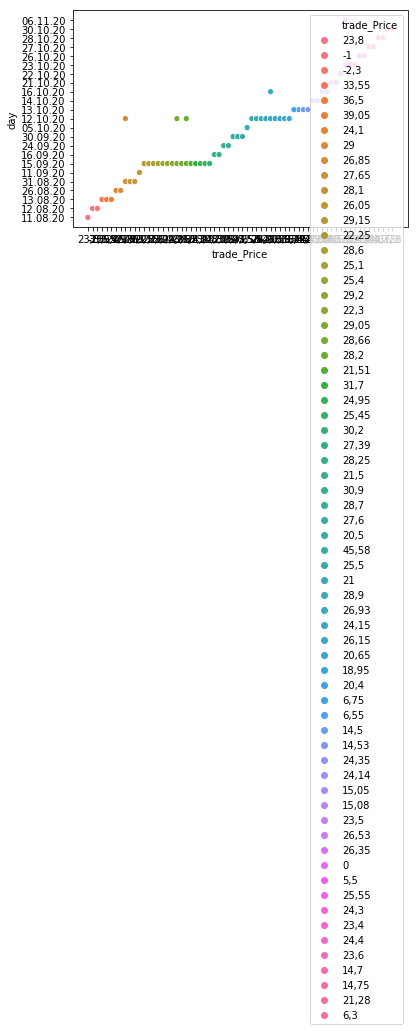

In [168]:
sns.scatterplot(x='trade_Price', y='day', hue='trade_Price', data=rocky_merged);

## IndexMgmt

In [128]:
index_mgmt = df_100[df_100['log_application'] == 'IndexMgmt']

In [ ]:
for row in index_mgmt['text_data'].head(10):
    print(row)

In [130]:
def index_mgmt_string_to_df(row):
    """
    Parses index mgmt trades to a dataframe with one row per trade
    Inputs data into an array, then into a dataframe (to save memory)
    """
    trades_strings = row.split('New RockyII trade')[1:]

    trades_array = np.zeros( (len(trades_strings), 4), dtype=object)
    trades_array_columns = ['trade_ID', 'price', 'product', 'volume']

    index = 0
    for trade in trades_strings:
        words = trade.split(' ')

        trade_index = words.index('trade_ID') + 1 # find index of search word 'trade_ID'
        trade_id = words[trade_index] # and store the value
        price_index = words.index('price') + 1
        price = words[price_index]
        product_index = words.index('product') + 1
        product = words[product_index]

        # place values into array
        trades_array[index][0] = trade_id
        trades_array[index][1] = price
        trades_array[index][2] = product

        #split on transactions
        transactions = trade.split('Creating transactions')[1:]
        volume = 0
        for trans in transactions:
            words =  trans.split(' ')
            vol_index = words.index('volume')+1
            volume += float(words[vol_index])
        # volume = sum([float(trans.split(' ')[trans.split(' ').index('volume')+1]) for trans in transactions])

        trades_array[index][3] = volume
        index += 1
    df = pd.DataFrame(trades_array, columns=trades_array_columns)
    df['trade_ID'] = df['trade_ID'].astype(int)
    df['price'] = df['price'].astype(float)
    df['product'] = df['product'].astype(str)
    df['volume'] = df['volume'].astype(float)
    return df

trades_series_dfs = index_mgmt['text_data'].apply(lambda x: index_mgmt_string_to_df(x))
index_mgmt_trades = pd.concat(trades_series_dfs.values.tolist(), ignore_index=True)

In [131]:
index_mgmt_trades

,trade_ID,price,product,volume
0,4842452,22.25,ENOYR-21,0.07937
1,4842453,24.45,ENOYR-22,0.19374
2,4842454,25.65,ENOYR-23,0.19605
3,4842455,25.65,ENOYR-23,0.13253
4,4842456,27.63,ENOYR-24,0.00264
5,4842457,27.63,ENOYR-24,0.14056
6,4842458,25.68,NEDEC20,-3.78698
7,4842459,22.25,ENOFUTBLYR-21,0.16653
8,4842460,24.45,ENOFUTBLYR-22,0.19303
9,4842461,2.70,SYSTOFUTBLYR-21,0.00355


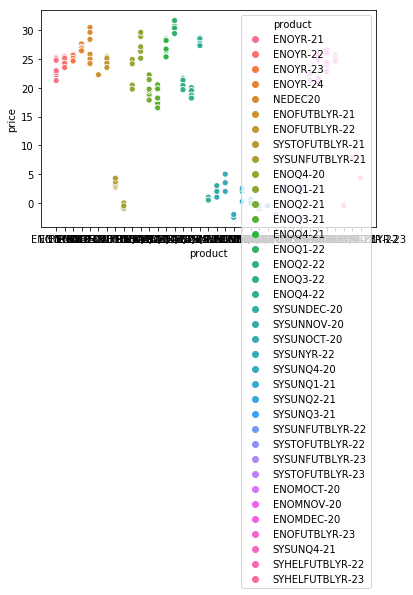

In [173]:
sns.scatterplot(x='product', y='price', hue='product', data=index_mgmt_trades);

## Wind Power Import

In [133]:
# Note, small DF
wind_power_import = df[df['log_application'] == 'Wind Power Import']
wind_power_import_date_text = wind_power_import[['log_date', 'text_data']]

In [135]:
wind_power_import.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
108,16395522,2020-08-01 01:45:52.437,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
745,16494688,2020-08-09 06:00:48.077,Wind Power Import,3,4656.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
5764,16561731,2020-08-14 09:50:50.320,Wind Power Import,3,4640.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
8969,16561784,2020-08-14 09:56:00.307,Wind Power Import,3,4647.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
7661,16580856,2020-08-15 12:30:49.180,Wind Power Import,3,4677.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...


In [136]:
def wind_park_df_structure_and_names():
    """
    Defines names of wind parks to be stored in wind_power_str_to_df function, as well as the dataframe columns
    """
    park_names = ["Bleikevare","Brahehus","Granberg","Hedboberget","Roebergsfjaellet","Saelitraedberget","Hedboberget 2","Kulltorp","Hällevadsholm","Håkantorp 2","Kvantenburg 2"]
    df = pd.DataFrame(park_names, columns = ['wind_park'], dtype='str')
    df['production'] = np.nan
    df['wind_speed'] = np.nan
    df['temperature'] = np.nan
    df['date'] = np.nan
    return df



def wind_power_str_to_df(row):
    """
    Takes the wind power string data and converts it to a dataframe with wind, temperature, and production information about each wind park
    """
    date, row_string = row
    df = wind_park_df_structure_and_names()
    df['date'] = date
    all_data_string = row_string.split('Saving data to Powel. ')[1]
    park_data_list = all_data_string.split('The wind park ')[1:]
    for park_data in park_data_list:
        words = park_data.split(' ')
        
        # Extract park_name with possibility of it being "Park" and "Park 2"
        if words[1].isdigit():
            park_name = words[0] + " " + words[1]
            padding = 1
        else: 
            park_name = words[0]
            padding = 0
            
        # Check for type of data: production, wind, temperature, or if it has no value
        data_type  = words[1 + padding] + words[2 + padding]
        data_type_to_set = ""
        
        # Select the column in the dataframe to add the value to 
        if "producing" in data_type:
            data_type_to_set = 'production'
            
        elif "wind" in data_type:
            data_type_to_set = 'wind_speed'
            
        elif "temperature" in data_type:
            data_type_to_set = 'temperature'
            
        elif "hasno" in data_type:
            data_type_to_set = 'skip'
            
        if data_type_to_set != "skip":
            value = words[3 + padding] # Value is always on index 3 if the park_name is one word
            df.loc[df["wind_park"] == park_name, data_type_to_set] = value
    
    df['production'] = df['production'].astype('str').apply(lambda x: x.replace('.', '').replace(',', '.')).astype('float')
    df['wind_speed'] = df['wind_speed'].astype('str').apply(lambda x: x.replace(',', '.')).astype('float')
    df.loc[df['temperature'] == 'N/A', 'temperature'] = np.nan
    df['temperature'] = df['temperature'].astype('str').apply(lambda x: x.replace(',', '.')).astype('float')
    df['date'] = pd.to_datetime(df['date'])
    return df
series = wind_power_import[['log_date', 'text_data']].apply(wind_power_str_to_df, axis=1)
wind_park_data = pd.concat(series.values.tolist(), ignore_index=True)

In [179]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [180]:
wind_park_data.shape

(2431, 5)

Adding Day column to wind_park_data

In [206]:
# Note: datetime -> string
wind_park_data['date'] = wind_park_data['date'].astype(str)

wind_park_day = pd.DataFrame(columns=['day'])
for row in wind_park_data['date']:
    wind_park_day = wind_park_day.append({'day': row[0:10]}, ignore_index=True)
wind_park_merged = pd.concat([wind_park_data, wind_park_day], axis=1)

In [207]:
wind_park_merged.head()

,wind_park,production,wind_speed,temperature,date,day
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437,2020-08-01
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437,2020-08-01
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437,2020-08-01
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437,2020-08-01
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437,2020-08-01


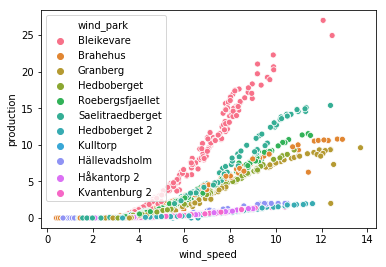

In [200]:
sns.scatterplot(x='wind_speed', y='production', hue='wind_park', data=wind_park_data);

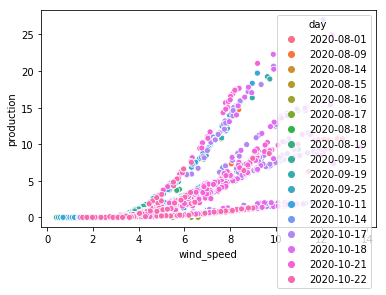

In [212]:
sns.scatterplot(x='wind_speed', y='production', hue='day', data=wind_park_merged);

# Merging dataframes

In [139]:
rocky_merge = rockyll_trade_id[['pro_ID', 'trade_Date', 'trade_ID', 'trade_Price']]
rocky_merge['trade_ID'] = rocky_merge['trade_ID'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [213]:
rocky_merge.head()

,pro_ID,trade_Date,trade_ID,trade_Price
0,1620627,11.08.2020 09:50:58,4837585,"23,8"
1,1053282,11.08.2020 10:06:17,4837586,"23,8"
2,2023205,12.08.2020 09:37:34,4837982,-1
3,2301718,12.08.2020 09:41:10,4837983,"-2,3"
4,2301718,12.08.2020 09:47:02,4837984,"-2,3"


In [ ]:
rocky_merge['pro_ID'].value_counts()

In [214]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [215]:
index_mgmt_trades.head()

,trade_ID,price,product,volume
0,4842452,22.25,ENOYR-21,0.07937
1,4842453,24.45,ENOYR-22,0.19374
2,4842454,25.65,ENOYR-23,0.19605
3,4842455,25.65,ENOYR-23,0.13253
4,4842456,27.63,ENOYR-24,0.00264


In [ ]:
rocky_merge['trade_ID']

## Merge RockyII and IndexMgmt on Trade_ID

In [217]:
df2 = pd.merge(index_mgmt_trades, rocky_merge, on='trade_ID')

In [218]:
df2

,trade_ID,price,product,volume,pro_ID,trade_Date,trade_Price


# Run anomaly models

In [235]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [236]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Wind Park Import 

In [231]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [233]:
# Checking if the data is balanced
wind_park_data['wind_park'].value_counts(normalize=True)

Granberg            0.090909
Bleikevare          0.090909
Håkantorp 2         0.090909
Hedboberget 2       0.090909
Hedboberget         0.090909
Saelitraedberget    0.090909
Kvantenburg 2       0.090909
Brahehus            0.090909
Hällevadsholm       0.090909
Roebergsfjaellet    0.090909
Kulltorp            0.090909
Name: wind_park, dtype: float64

In [243]:
wind_park_data['date'].value_counts()

2020-10-11 13:05:46.087    11
2020-10-17 23:20:44.947    11
2020-10-14 14:30:56.887    11
2020-10-17 20:50:44.490    11
2020-10-11 09:05:46.477    11
2020-10-11 08:30:47.627    11
2020-10-11 08:20:47.230    11
2020-09-15 10:45:59.997    11
2020-10-17 19:15:48.233    11
2020-10-11 15:20:49.257    11
2020-09-15 13:35:49.707    11
2020-10-18 02:20:52.767    11
2020-08-19 01:45:59.267    11
2020-10-21 20:40:44.850    11
2020-10-17 23:40:47.093    11
2020-10-21 18:50:50.850    11
2020-08-01 01:45:52.437    11
2020-10-11 15:15:54.033    11
2020-09-15 13:20:47.170    11
2020-10-11 14:30:45.803    11
2020-10-11 10:55:49.910    11
2020-10-11 13:25:46.440    11
2020-09-19 16:20:46.150    11
2020-10-21 16:30:53.133    11
2020-10-11 08:50:46.287    11
2020-10-22 11:40:45.197    11
2020-10-17 16:10:43.933    11
2020-09-15 11:26:02.650    11
2020-10-17 21:25:52.490    11
2020-10-21 21:00:55.603    11
                           ..
2020-10-11 13:30:44.713    11
2020-10-17 23:50:44.727    11
2020-10-21

### Import larger wind power import dataframe

In [279]:
wind_power_import_100 = df_100[df_100['log_application'] == 'Wind Power Import']
wind_power_import_date_text = wind_power_import[['log_date', 'text_data']]

In [280]:
series = wind_power_import_100[['log_date', 'text_data']].apply(wind_power_str_to_df, axis=1)
wind_park_data_100 = pd.concat(series.values.tolist(), ignore_index=True)

In [281]:
wind_park_data_100['date'] = wind_park_data_100['date'].astype(str)

In [282]:
# Preprocessing data
wind_park_data_100['date'] = wind_park_data_100['date'].astype(str)

wind_park_day = pd.DataFrame(columns=['day'])
for row in wind_park_data['date']:
    wind_park_day = wind_park_day.append({'day': row[0:10]}, ignore_index=True)
wind_park_merged = pd.concat([wind_park_data, wind_park_day], axis=1)

In [268]:
wind_park_data_day = wind_park_merged

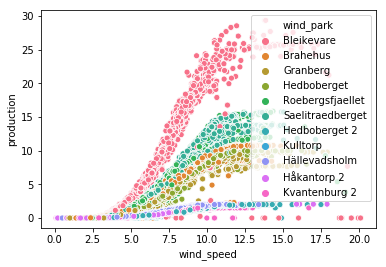

In [269]:
sns.scatterplot(x='wind_speed', y='production', hue='wind_park', data=wind_park_data_100);

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
rng = np.random.RandomState(42)

# Splitting wind_park_data into train and test sets
# X_train, X_test, = train_test_split(wind_park_data_100, test_size=0.33, random_state=42)

In [278]:
wind_park_data_100.columns

Index(['wind_park', 'production', 'wind_speed', 'temperature', 'date',
       'scores'],
      dtype='object')

In [271]:
from sklearn.tree import DecisionTreeClassifier
clf = IsolationForest(random_state=rng, behaviour="new")

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    clf
)

# Fit on train
pipeline.fit(wind_park_data_100)

# Score on val
# pipeline.predict(X_test)
y_pred_train = pipeline.predict(wind_park_data_100)
y_pred_train

# # Predict on test (submit kaggle)
# y_pred = pipeline.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['wind_park', 'date'], drop_invariant=False,
       handle_missing='value', handle_unknown='value', return_df=True,
       use_cat_names=True, verbose=0)), ('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
   ...s=None,
        random_state=<mtrand.RandomState object at 0x000001C40AF70B88>,
        verbose=0))])

In [284]:
y_pred_train = pipeline.predict(wind_park_data_100)
y_pred_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([1, 1, 1, ..., 1, 1, 1])

In [286]:
y_pred_train.shape

(23892,)

In [313]:
wind_park_data_100.shape

(23892, 5)

In [ ]:
# Isolation Forest on Production
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    clf
)

# Fit on train
pipeline.fit(wind_park_data_100[['production', 'wind_speed']])

# Score on val
# pipeline.predict(X_test)
y_pred_train_prod = pipeline.predict(wind_park_data_100[['production', 'wind_speed']])
y_pred_train_prod

In [325]:
wind_park_anomalies_prod = pd.concat([wind_park_data_100_test, pd.Series(y_pred_train_prod)], axis=1)

In [ ]:
wind_park_anomalies_prod.columns = ['wind_park', 'production', 'wind_speed', 'temperature', 'date',
       'scores', 'anomaly']
anomaly_prod=wind_park_anomalies_prod.loc[wind_park_anomalies_prod['anomaly']==-1]
anomaly_index=list(anomaly_prod.index)
print(anomaly_prod)

In [ ]:
import matplotlib.pyplot as plt
'''
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = pipeline.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(wind_park_anomalies_prod[:, 0], wind_park_anomalies_prod[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(wind_park_anomalies_prod[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()
'''

In [276]:
wind_park_data_100_test = wind_park_data_100

In [ ]:
y_pred_train = clf.predict(X_train)

In [295]:
# Add Anomalies onto DF
wind_park_anomalies = pd.concat([wind_park_data_100_test, pd.Series(y_pred_train)], axis=1)

In [301]:
wind_park_anomalies.columns

Index(['wind_park', 'production', 'wind_speed', 'temperature', 'date',
       'scores', 0],
      dtype='object')

In [302]:
wind_park_anomalies.columns = ['wind_park', 'production', 'wind_speed', 'temperature', 'date',
       'scores', 'anomaly']

In [ ]:
anomaly=wind_park_anomalies.loc[wind_park_anomalies['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

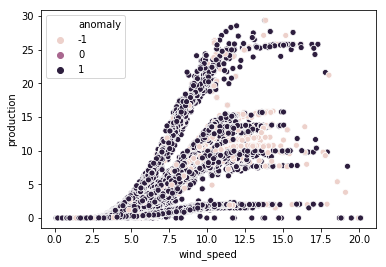

In [305]:
sns.scatterplot(x='wind_speed', y='production', hue='anomaly', data=wind_park_anomalies);

In [ ]:
# wind_park_data_100_test['scores']=pipeline.decision_function(wind_park_data_100)
# wind_park_data_100_test['anomaly']=pipeline.predict(wind_park_data_100)
# wind_park_data_100_test.head(20)

In [ ]:
wind_park_anomalies['scores'].value_counts()

# Using wind mill data to predict production

## Decision Tree Regressor, preprocessing

In [350]:
# Kulltorp always NaN
Kulltorp = wind_park_data[wind_park_data['wind_park'] == 'Kulltorp']

In [333]:
wind_park_data.shape

(2431, 5)

In [339]:
wind_park_data.dtypes

wind_park       object
production     float64
wind_speed     float64
temperature    float64
date            object
dtype: object

In [361]:
# Reduce float columns to 2 significant figures
wind_park_data_day = wind_park_data_day.round(2)

In [ ]:
# Production data is highly stratified. Model must account for this.
wind_park_data_day['production'].value_counts(normalize=True)

In [346]:
# Håkantorp 2 & Kvantenburg 2 do not have temperature measurements
# Kulltorp seems to only return NaN values

wind_park_data_day.isnull().sum()

wind_park        0
production     305
wind_speed     305
temperature    746
date             0
dtype: int64

In [362]:
# Removing NaN values for train_test_split
wind_park_data_day = wind_park_data_day.dropna()

In [363]:
wind_park_data_day.isnull().sum()

wind_park      0
production     0
wind_speed     0
temperature    0
date           0
day            0
dtype: int64

In [364]:
wind_park_data_day.shape

(1685, 6)

In [365]:
# stratify=wind_park_data['production'] Error: The least populated class in y has only 1 member, which is too few.
# Se etter annen måte å balansere target.

train, val = train_test_split(wind_park_data_day, train_size=.8, test_size = .2, random_state = 42)

In [411]:
# Set target
target = 'production'

# get a dataframe with all train columns - target & wind_speed
# wind_speed accounts for almost all predictive power
train_features = train.drop(columns=[target, 'wind_speed'])

# Get a list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists
features = numeric_features + categorical_features
print(features)

['temperature', 'wind_park', 'day']


In [412]:
# Arrange the data into X features matrix and y target vector

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
# X_test = test[features]

In [387]:
# Get baseline
wind_park_data_day['production'].median()

1.15

In [388]:
wind_park_data_day['production'].mean()

2.980124629080118

In [389]:
# Get baseline validation accuracy score

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs =-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Logistic Regression Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
# y_pred = pipeline.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [413]:
# 98% Validation accuracy. We've got leakage.

from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    DecisionTreeRegressor(random_state = 42, max_depth=20, min_samples_leaf=6, min_samples_split=15)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test (submit kaggle)
# y_pred = pipeline.predict(X_test)

Validation Accuracy 0.8354382989536496


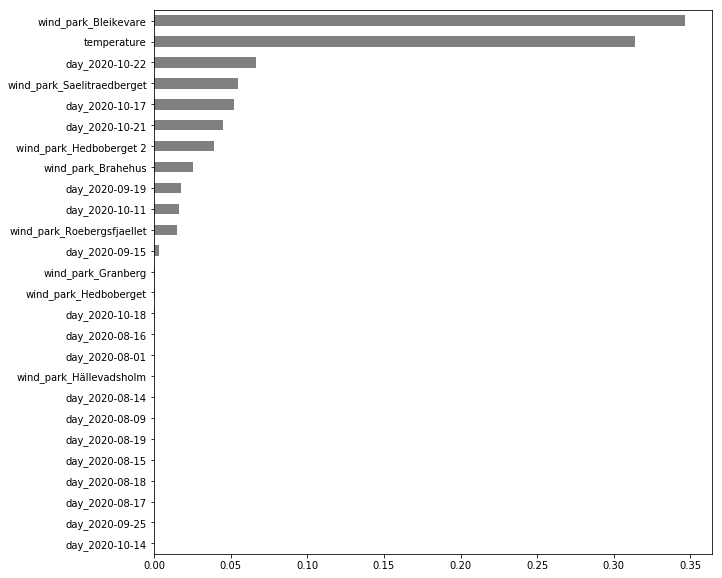

In [414]:
model = pipeline.named_steps['decisiontreeregressor']
# Linear models have coefficients, 
# Trees have feature importances

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,10))
importances.sort_values() .plot.barh(color='grey');

# Temp & Bleikevare highly predictive.
# Days are fairly leaky?

In [416]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [417]:
train_location_temp = X_train[['wind_park', 'temperature']].copy()
val_location_temp = X_val[['wind_park', 'temperature']].copy()

In [419]:
train_location_temp.dtypes

wind_park       object
temperature    float64
dtype: object

In [421]:
encoded_columns

Index(['temperature', 'wind_park_Brahehus', 'wind_park_Hedboberget',
       'wind_park_Roebergsfjaellet', 'wind_park_Hedboberget 2',
       'wind_park_Saelitraedberget', 'wind_park_Hällevadsholm',
       'wind_park_Bleikevare', 'wind_park_Granberg', 'day_2020-10-22',
       'day_2020-10-11', 'day_2020-09-15', 'day_2020-10-17', 'day_2020-09-19',
       'day_2020-10-21', 'day_2020-08-18', 'day_2020-10-18', 'day_2020-08-17',
       'day_2020-09-25', 'day_2020-08-19', 'day_2020-08-14', 'day_2020-08-09',
       'day_2020-08-16', 'day_2020-08-01', 'day_2020-08-15', 'day_2020-10-14'],
      dtype='object')

In [420]:
from IPython.display import display, HTML
import graphviz
from sklearn.tree import export_graphviz

for max_depth in range(4, 20):
  # Fit decision tree
  dt = make_pipeline(
      SimpleImputer(),
      DecisionTreeRegressor(max_depth=max_depth, random_state=42)
  )
  dt.fit(encoded_columns, train_location_temp) # train_location instead of X_train originally (2 features)

 # Display depth & scores
  display(HTML(f'Max Depth {max_depth}'))
  display(HTML(f'Train Accuracy {dt.score(train_location_temp, y_train):.2f}'))
  display(HTML(f'Validation Accuracy {dt.score(val_location_temp, y_val):.2f}'))

  # # Plot heatmap of predicted probabilities
  # pred_heatmap(dt, X_train, features, class_index=0, title='Predicted probability')

ValueError: Cannot use mean strategy with non-numeric data. Received datatype :O.

# Planlegging

In [ ]:
1. Gå gjennom alt av data og finner ut hva det betyr
2. Clean data
3. Sett data i rekkefølge (tid) - Se sammenheng mellom datapunktene.
4. Planlegg: Hvilke muligheter for modellering har vi?
5. Velg appropriate mulighet
6. Wrangle data
7. kjør modell

In [ ]:
Er det noe poeng i å lage graphs?
- Tror ikke det er noe vits i før jeg har laget dataframes av EF+/Rocky, Wind Power Export
-- Så kan vi graphe de.

- Er det interessant å graphe tidsdata?
- Fra initial analyse ser det ut som columns som:
-- log_application, log_text, log_id, lvl_id, log_attlen, log_text
--- Er ikke interessant å graphe.

In [ ]:
Tanker:
Ser ut som alle RockyII trades er logget i IndexMgmt og executed i EF+.
Derfor: sjekk med et større dataset om å scrape data fra EF+ gir nok info fra RockyII trades

Vi kan dermed bruke:
+ Wind Power Import tallene fra Sverige
+ EF+ tallene
+ Nord Pool tall fra eksternt dataset
= til en neural network modell som predikerer pris for neste dag.

Hva trenger jeg for å få det til?
- Sjekk om nødvendig info er i EF+
-- Gjør analyse av 100k row dataset.
--- Sjekk om alle RockyII trades er i EF+
-- Hvis ikke: scrape data fra RockyII
--- Put i dataframe, concat RockyII_DF med DF
- Scrape Wind Power Import tall
-- Split på "Sender til Powel", så ha 3 columns, for Production, temp, wind speed.
- Import Nord Pool pris dataset
-- Merge på date
-- Klar til modell?